In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from matplotlib.lines import Line2D
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from datetime import datetime
%matplotlib inline

Using TensorFlow backend.


In [3]:
saf = pd.DataFrame.from_csv('Safaricom.csv')
print('Data loaded...')

Data loaded...


In [4]:
saf.head()

,Open,High,Low,Close,Vol.,Change %
Date,,,,,,
2012-11-06,3.40,3.45,3.35,3.40,3.24M,0.00%
2012-12-06,3.40,3.50,3.40,3.45,6.09M,1.47%
2012-06-13,3.45,3.45,3.35,3.40,7.29M,-1.45%
2012-06-14,3.40,3.45,3.35,3.40,31.81M,0.00%
2012-06-15,3.40,3.50,3.40,3.40,7.57M,0.00%


In [5]:
saf.shape

(1753, 6)

In [6]:
saf.describe()

,Open,High,Low,Close
count,1753.000000,1753.000000,1753.000000,1753.000000
mean,16.797233,17.045807,16.591671,16.783434
std,7.694943,7.776212,7.568492,7.637384
min,0.000000,3.450000,3.350000,3.400000
25%,12.000000,12.100000,11.900000,12.000000
50%,16.250000,16.500000,16.050000,16.250000
75%,23.500000,23.750000,23.050000,23.450000
max,32.750000,33.500000,32.500000,32.750000


In [7]:
saf.tail()

,Open,High,Low,Close,Vol.,Change %
Date,,,,,,
2019-10-06,27.1,27.60,27.05,27.45,1.33M,0.18%
2019-11-06,27.5,27.70,27.20,27.55,1.71M,0.36%
2019-12-06,27.6,27.65,27.30,27.50,22.67M,-0.18%
2019-06-13,27.5,27.70,27.10,27.35,22.56M,-0.55%
2019-06-14,27.5,27.50,27.05,27.20,5.30M,-0.55%


In [8]:
saf['PriceDiff'] = saf['Close'].shift(-1) - saf['Close']
saf['Return'] = saf['PriceDiff']/saf['Close']
saf['Direction'] = [1 if saf['PriceDiff'].loc[ei] > 0 else 0 for ei in saf.index]
saf['MA10'] = saf['Close'].rolling(10).mean()
saf['MA50'] = saf['Close'].rolling(50).mean()

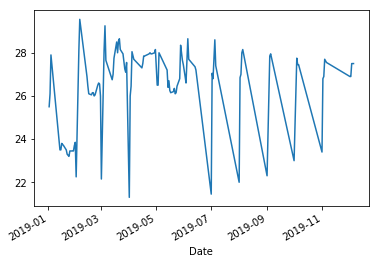

In [9]:
saf_2012 = saf.loc['2012-01-01':'2012-12-31']
saf_2013 = saf.loc['2013-01-01':'2013-12-31']
saf_2014 = saf.loc['2014-01-01':'2014-12-31']
saf_2015 = saf.loc['2015-01-01':'2015-12-31']
saf_2016 = saf.loc['2016-01-01':'2016-12-31']
saf_2017 = saf.loc['2017-01-01':'2017-12-31']
saf_2018 = saf.loc['2018-01-01':'2018-12-31']
saf_2019 = saf.loc['2019-01-01':'2019-12-31', 'Close'].plot()

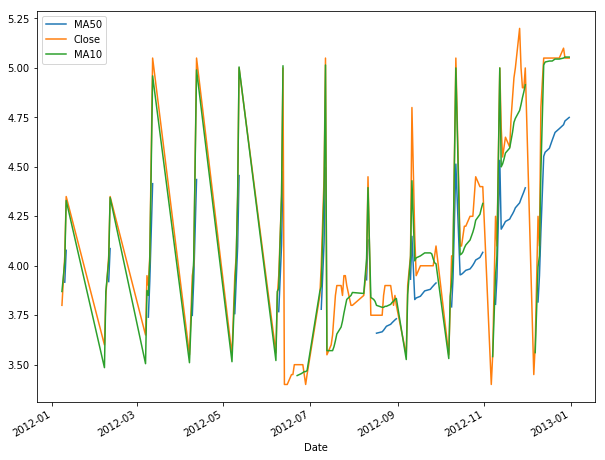

In [10]:
plt.figure(figsize=(10,8))
saf_2012['MA50'].plot(label='MA50')
saf_2012['Close'].plot(label='Close')
saf_2012['MA10'].plot(label='MA10')
plt.legend()
plt.show()

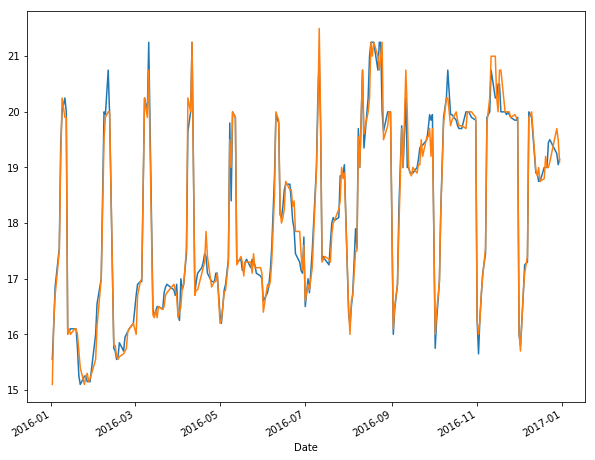

In [101]:
plt.figure(figsize = (10,8))
saf_2016['Close'].plot()
saf_2016['Open'].plot()
plt.show()

In [102]:
saf['Shares'] = [1 if saf.loc[ei, 'MA10'] > saf.loc[ei, 'MA50'] else 0 for ei in saf.index]

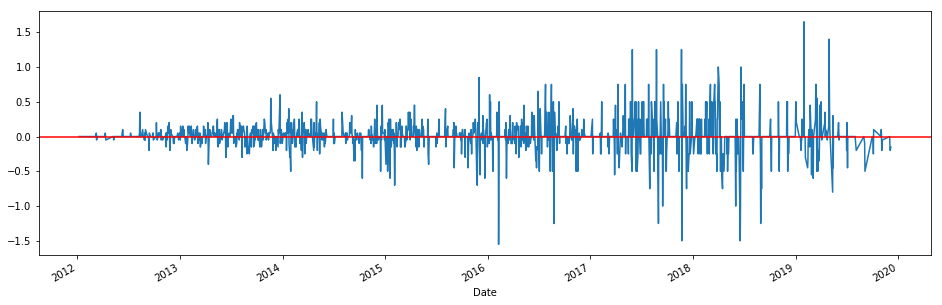

In [103]:
saf['Close1'] = saf['Close'].shift(-1)
saf['Profit'] = [saf.loc[ei, 'Close1'] - saf.loc[ei, 'Close'] if saf.loc[ei, 'Shares'] == 1 else 0 for ei in saf.index]
saf['Profit'].plot()
plt.axhline(y=0, color='red')

In [104]:
saf['Wealth'] = saf['Profit'].cumsum()
saf.tail()

,Open,High,Low,Close,Vol.,Change %,PriceDiff,Return,Direction,MA10,MA50,Shares,Close1,Profit,Wealth
Date,,,,,,,,,,,,,,,
2019-10-06,27.1,27.60,27.05,27.45,1.33M,0.18%,0.10,0.003643,1,27.615,27.581,1,27.55,0.10,19.35
2019-11-06,27.5,27.70,27.20,27.55,1.71M,0.36%,-0.05,-0.001815,0,27.690,27.587,1,27.50,-0.05,19.30
2019-12-06,27.6,27.65,27.30,27.50,22.67M,-0.18%,-0.15,-0.005455,0,27.605,27.595,1,27.35,-0.15,19.15
2019-06-13,27.5,27.70,27.10,27.35,22.56M,-0.55%,-0.15,-0.005484,0,27.540,27.591,0,27.20,0.00,19.15
2019-06-14,27.5,27.50,27.05,27.20,5.30M,-0.55%,NaN,NaN,0,27.495,27.577,0,NaN,0.00,19.15


Text(0.5, 1.0, 'Total money you win is 19.150000000000002')

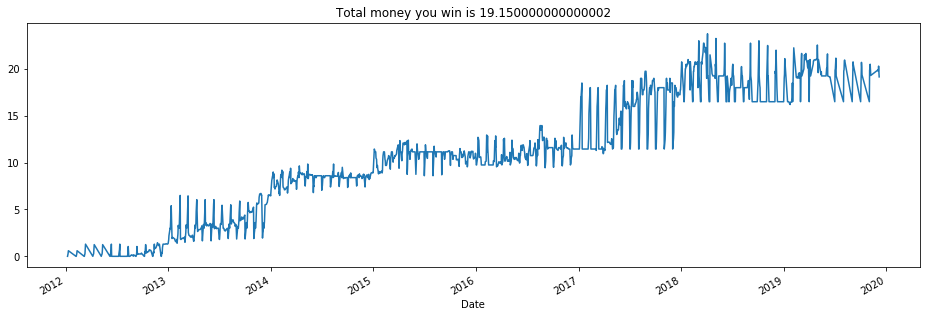

In [105]:
saf['Wealth'].plot()
plt.title('Total money you win is {}'.format(saf.loc[saf.index[-2], 'Wealth']))

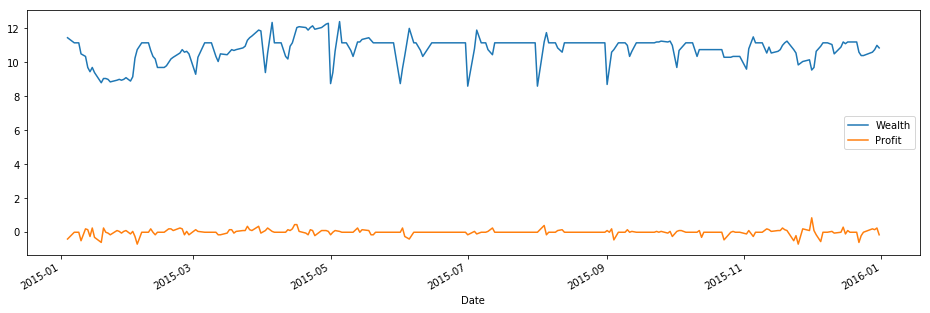

In [106]:
saf['Wealth'].loc['2015'].plot(label='Wealth')
saf['Profit'].loc['2015'].plot(label='Profit')
plt.legend()

In [107]:
saf.isnull().any()

Open         False
High         False
Low          False
Close        False
Vol.         False
Change %     False
PriceDiff     True
Return        True
Direction    False
MA10          True
MA50          True
Shares       False
Close1        True
Profit       False
Wealth       False
dtype: bool

In [108]:
rcParams['figure.figsize'] = 16,5
vTicker = 'KEGN'
print(vTicker)
saf.head()

KEGN


,Open,High,Low,Close,Vol.,Change %,PriceDiff,Return,Direction,MA10,MA50,Shares,Close1,Profit,Wealth
Date,,,,,,,,,,,,,,,
2012-11-06,3.40,3.45,3.35,3.40,3.24M,0.00%,0.05,0.014706,1,NaN,NaN,0,3.45,0.0,0.0
2012-12-06,3.40,3.50,3.40,3.45,6.09M,1.47%,-0.05,-0.014493,0,NaN,NaN,0,3.40,0.0,0.0
2012-06-13,3.45,3.45,3.35,3.40,7.29M,-1.45%,0.00,0.000000,0,NaN,NaN,0,3.40,0.0,0.0
2012-06-14,3.40,3.45,3.35,3.40,31.81M,0.00%,0.00,0.000000,0,NaN,NaN,0,3.40,0.0,0.0
2012-06-15,3.40,3.50,3.40,3.40,7.57M,0.00%,0.05,0.014706,1,NaN,NaN,0,3.45,0.0,0.0


In [109]:
saf.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Vol.          object
Change %      object
PriceDiff    float64
Return       float64
Direction      int64
MA10         float64
MA50         float64
Shares         int64
Close1       float64
Profit       float64
Wealth       float64
dtype: object

Text(0.5, 1.0, '[KEGN] - CLOSING PRICE TREND')

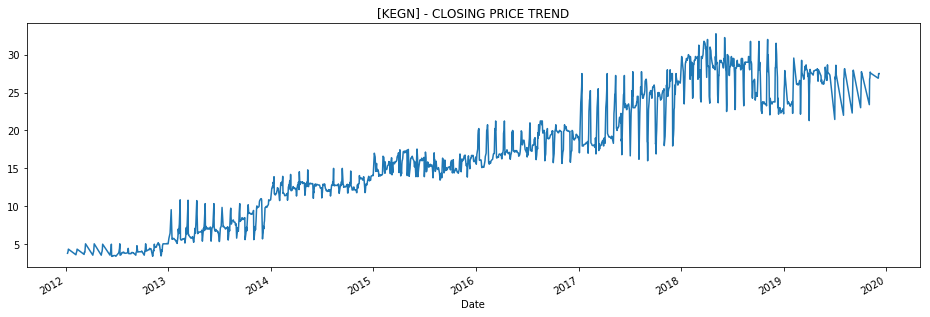

In [110]:
saf['Close'].plot()
plt.title(f'[{vTicker}] - CLOSING PRICE TREND')

In [114]:
saf.columns
todrop = ['Open', 'High', 'Low', 'Vol.', 'Change %', 'PriceDiff', 'Return', 'Direction', 'MA50', 'MA10', 'Shares', 'Close1', 'Profit', 'Wealth']
saf_data = saf.copy()
saf_data = saf_data.drop(todrop, axis=1)
saf_data.head()

,Close
Date,
2012-11-06,3.40
2012-12-06,3.45
2012-06-13,3.40
2012-06-14,3.40
2012-06-15,3.40


In [115]:
vcount = round(saf_data.shape[0]*0.8)
dset = saf_data.values
train = dset[0:vcount, :]
valid = dset[vcount:,:]
saf_data.shape, train.shape, valid.shape

((1753, 1), (1402, 1), (351, 1))

In [120]:
scaler = MinMaxScaler(feature_range=(0,1))
training_data = scaler.fit_transform(train)

features_set = []
labels = []

for i in range(60, train.shape[0]):
    features_set.append(training_data[i-60:i, 0])
    labels.append(training_data[i, 0])

features_set, labels = np.array(features_set), np.array(labels)
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(features_set, labels, epochs = 100, batch_size = 32)

Epoch 1/100
1342/1342 [==============================] - 6s 5ms/step - loss: 0.0248
Epoch 2/100
1342/1342 [==============================] - 4s 3ms/step - loss: 0.0038
Epoch 3/100
1342/1342 [==============================] - 4s 3ms/step - loss: 0.0031
Epoch 4/100
1342/1342 [==============================] - 4s 3ms/step - loss: 0.0030
Epoch 5/100
1342/1342 [==============================] - 4s 3ms/step - loss: 0.0027
Epoch 6/100
1342/1342 [==============================] - 4s 3ms/step - loss: 0.0028
Epoch 7/100
1342/1342 [==============================] - 4s 3ms/step - loss: 0.0028
Epoch 8/100
1342/1342 [==============================] - 4s 3ms/step - loss: 0.0029
Epoch 9/100
1342/1342 [==============================] - 4s 3ms/step - loss: 0.0025
Epoch 10/100
1342/1342 [==============================] - 4s 3ms/step - loss: 0.0026
Epoch 11/100
1342/1342 [==============================] - 4s 3ms/step - loss: 0.0025
Epoch 12/100
1342/1342 [==============================] - 4s 3ms/step - lo

1342/1342 [==============================] - 4s 3ms/step - loss: 8.0188e-04
Epoch 97/100
1342/1342 [==============================] - 4s 3ms/step - loss: 8.6361e-04
Epoch 98/100
1342/1342 [==============================] - 4s 3ms/step - loss: 8.5048e-04
Epoch 99/100
1342/1342 [==============================] - 4s 3ms/step - loss: 0.0010
Epoch 100/100
1342/1342 [==============================] - 4s 3ms/step - loss: 8.7644e-04


In [123]:
test_inputs = saf_data[len(saf_data) - len(valid) - 60:].values
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

test_features = []
for i in range(60, test_inputs.shape[0]):
    test_features.append(test_inputs[i-60:i, 0])
    
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

predictions = model.predict(test_features)
predictions = scaler.inverse_transform(predictions)
predictions.shape

(351, 1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


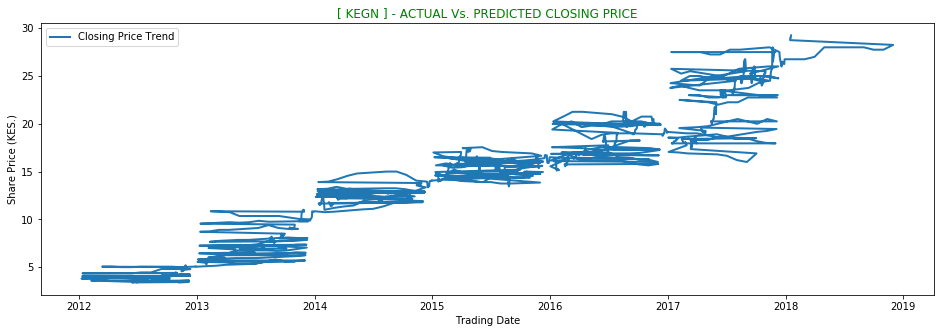

In [131]:
train = saf_data[:vcount]
valid = saf_data[vcount:]

valid['Predictions'] = predictions
plt.plot(train['Close'], label='Closing Price Trend', lw=2)

#plt.plot(valid[['Close','Predictions']], dashes=[3, 2], label='Actual Vs. Predicted Closing Price', lw=2)
# plt.plot(valid['Close'], label='Actual Closing Price', lw=1)
# plt.plot(valid['Predictions'], dashes=[1, 2], label='Predicted Price', lw=2)

plt.title('[ ' + vTicker + ' ] - ACTUAL Vs. PREDICTED CLOSING PRICE').set_color('green')
plt.ylabel('Share Price (KES.)')
plt.xlabel('Trading Date')

plt.legend()
plt.show()